In [1]:
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *
from fastai.imports import *
import gc
import pandas as pd

%matplotlib inline

In [6]:
PATH = "/content/extracted_files/"
TRAINING_PATH = "/content/extracted_files/train_labels.csv"
TEST_PATH = "/content/extracted_files/test_labels.csv"
CUSTOM_DATASET_PATH = "clothes_categories/test_labels_phone.csv"
CLASSES_PATH = "classes.txt"

In [7]:
train_df = pd.read_csv(TRAINING_PATH)
train_df.head()

,image_name,category_name
0,img\Sheer_Pleated-Front_Blouse\img_00000001.jpg,Blouse
1,img\Sheer_Pleated-Front_Blouse\img_00000002.jpg,Blouse
2,img\Sheer_Pleated-Front_Blouse\img_00000003.jpg,Blouse
3,img\Sheer_Pleated-Front_Blouse\img_00000004.jpg,Blouse
4,img\Sheer_Pleated-Front_Blouse\img_00000006.jpg,Blouse


In [8]:
train_df['image_name'] = train_df['image_name'].str.replace('\\', '/')

In [9]:
train_df.head()

,image_name,category_name
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,Blouse


In [10]:
 train_df.to_csv(TRAINING_PATH, index=False)

In [3]:
import gdown

file_id = '1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK'  # Replace with the actual file ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'file.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK
From (redirected): https://drive.google.com/uc?id=1MD6xgMhnH-HkT1xzsIGZOcYJwMbR4dZK&confirm=t&uuid=28c040fa-058f-4b75-b29e-e265f8aa4ab0
To: /content/file.zip
100%|██████████| 2.68G/2.68G [00:53<00:00, 50.4MB/s]


'file.zip'

In [4]:
import zipfile

In [5]:
with zipfile.ZipFile('file.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')

In [11]:
data = ImageDataLoaders.from_csv(PATH, csv_fname=TRAINING_PATH,
                                 item_tfms=Resize(300),
                                 batch_tfms=aug_transforms(size=224, min_scale=0.9),
                                 valid_pct=0.1,
                                 splitter=RandomSplitter(seed=42), #seed=42
                                 num_workers=0)

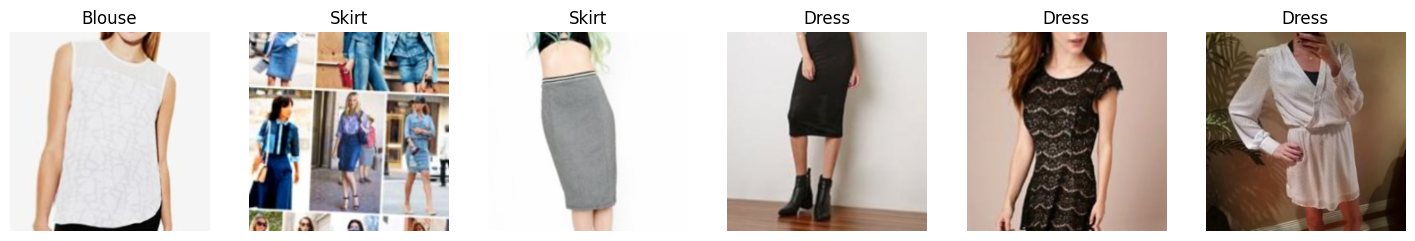

In [12]:
data.show_batch(max_n=6, nrows=1)

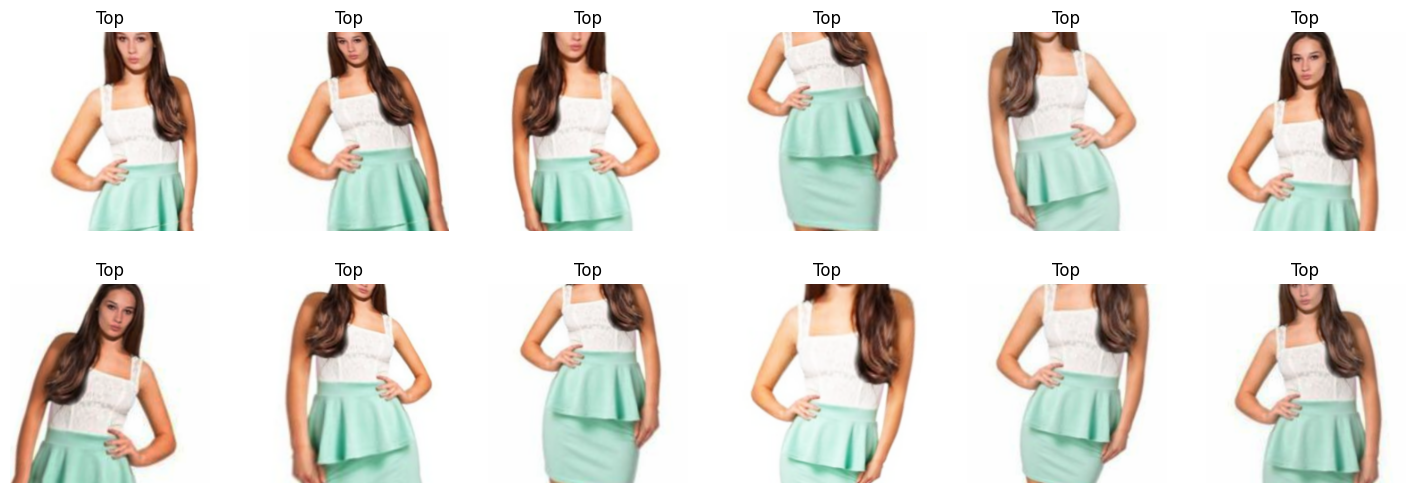

In [13]:
data.show_batch(max_n=12, nrows=2, unique=True)

In [14]:
learn = cnn_learner(data, resnet34, metrics=accuracy, pretrained=True)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 139MB/s]


In [15]:
file_id = '1_SsJ1K0UcXghoqlVxCn2sJ36blbVN6t3'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'atr-recognition-stage-1-resnet34.pth', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1_SsJ1K0UcXghoqlVxCn2sJ36blbVN6t3
From (redirected): https://drive.google.com/uc?id=1_SsJ1K0UcXghoqlVxCn2sJ36blbVN6t3&confirm=t&uuid=5e5e2cb9-4f58-43b2-a498-8063648021f5
To: /content/atr-recognition-stage-1-resnet34.pth
100%|██████████| 262M/262M [00:05<00:00, 44.6MB/s]


'atr-recognition-stage-1-resnet34.pth'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
learn.load('/content/atr-recognition-stage-1-resnet34')

In [17]:
gc.collect()
torch.cuda.empty_cache()

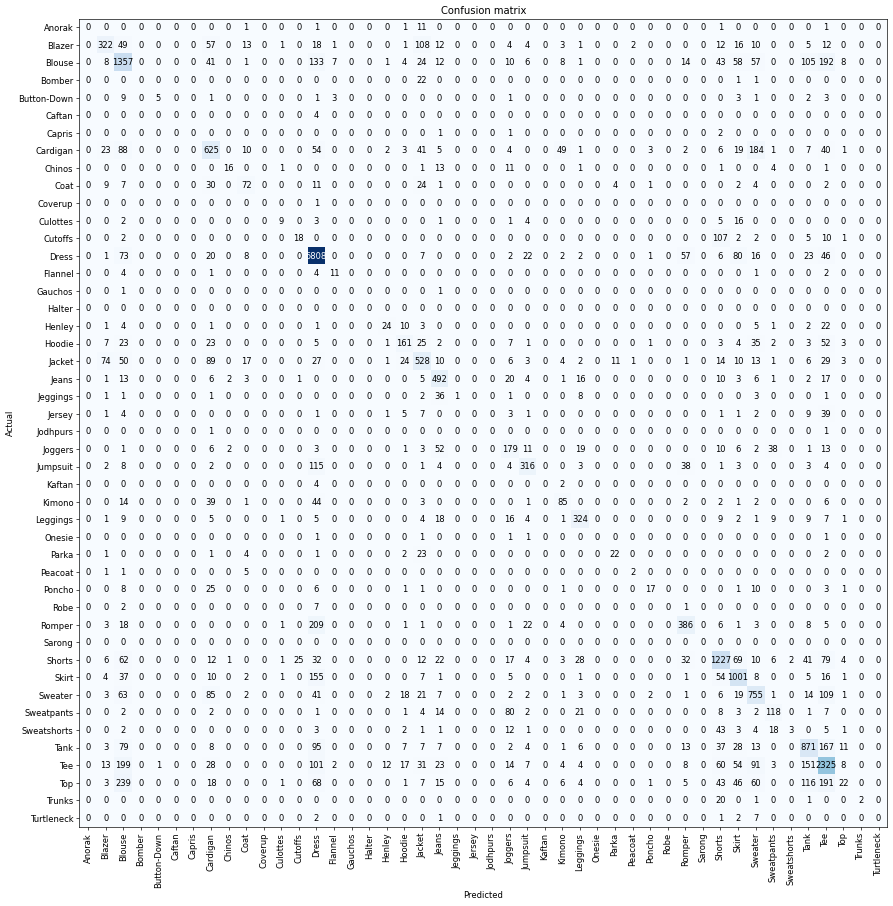

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [ ]:
interp.most_confused(min_val=70)

[('Top', 'Blouse', 251),
 ('Romper', 'Dress', 237),
 ('Tee', 'Blouse', 212),
 ('Top', 'Tee', 196),
 ('Cardigan', 'Sweater', 188),
 ('Blouse', 'Tee', 183),
 ('Tank', 'Tee', 176),
 ('Blouse', 'Dress', 167),
 ('Tee', 'Tank', 153),
 ('Skirt', 'Dress', 141),
 ('Top', 'Tank', 132),
 ('Blouse', 'Tank', 119),
 ('Jumpsuit', 'Dress', 115),
 ('Tee', 'Dress', 111),
 ('Tee', 'Sweater', 111),
 ('Sweater', 'Tee', 108),
 ('Blazer', 'Jacket', 105),
 ('Sweater', 'Cardigan', 100),
 ('Cutoffs', 'Shorts', 99),
 ('Dress', 'Skirt', 95),
 ('Dress', 'Blouse', 94),
 ('Shorts', 'Tee', 93),
 ('Jacket', 'Cardigan', 87),
 ('Tank', 'Blouse', 87),
 ('Cardigan', 'Blouse', 83),
 ('Sweatpants', 'Joggers', 79),
 ('Top', 'Sweater', 76),
 ('Shorts', 'Blouse', 70)]

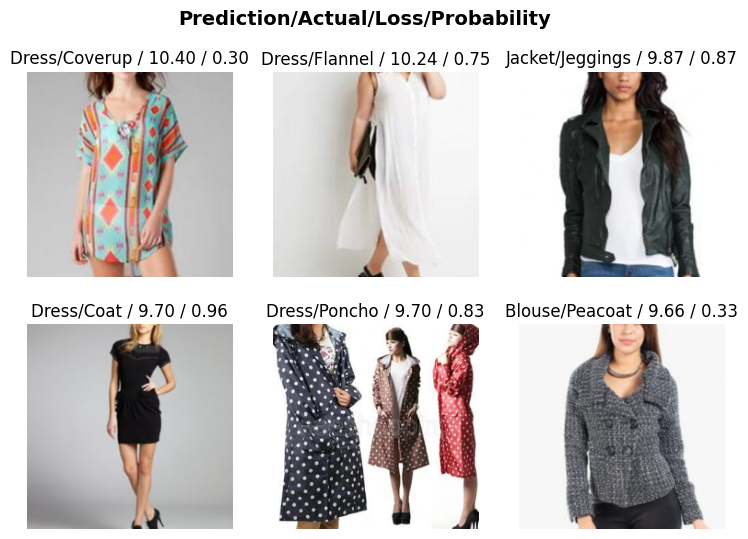

In [19]:
interp.plot_top_losses(6, nrows=2)

In [20]:
file_id = '1CLjK1_oRDgQBSo3Zm53RP3Dm_qufQtcV'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'model_tune.pth', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1CLjK1_oRDgQBSo3Zm53RP3Dm_qufQtcV
From (redirected): https://drive.google.com/uc?id=1CLjK1_oRDgQBSo3Zm53RP3Dm_qufQtcV&confirm=t&uuid=41d6043e-6734-4353-b334-caefbe1986a5
To: /content/model_tune.pth
100%|██████████| 87.5M/87.5M [00:02<00:00, 31.5MB/s]


'model_tune.pth'

In [21]:
learn.load('/content/model_tune')

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [23]:
modelname = learn.model
modelname.cpu()
torch.save(modelname, 'stage-1_resnet34.pkl')

with open(PATH+CLASSES_PATH, 'w') as f:
    for item in data.vocab:
        f.write("%s\n" % item)

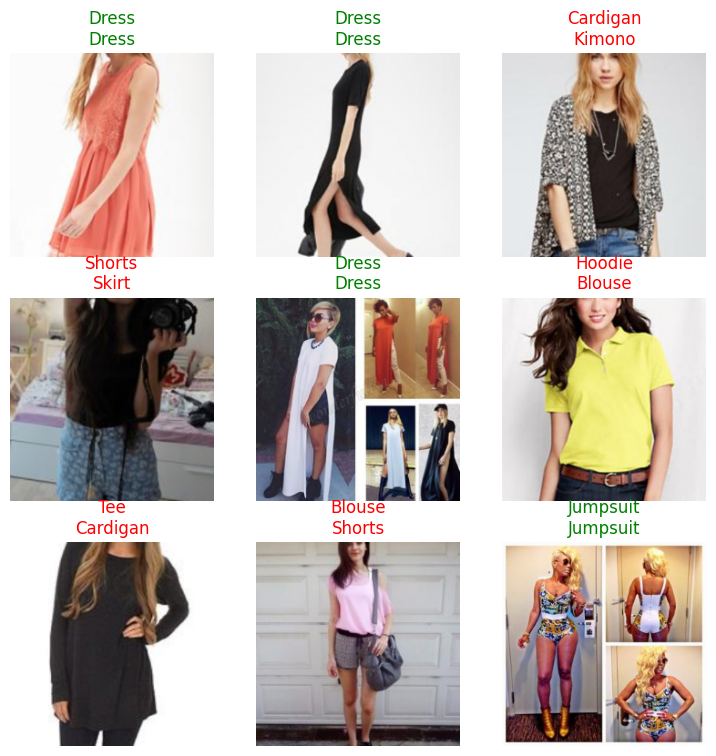

In [24]:
learn.show_results()

In [25]:
test_df = pd.read_csv(TEST_PATH)
test_df.head()

,image_name,category_name
0,img\Sheer_Pleated-Front_Blouse\img_00000005.jpg,Blouse
1,img\Sheer_Pleated-Front_Blouse\img_00000007.jpg,Blouse
2,img\Sheer_Pleated-Front_Blouse\img_00000013.jpg,Blouse
3,img\Sheer_Pleated-Front_Blouse\img_00000019.jpg,Blouse
4,img\Sheer_Pleated-Front_Blouse\img_00000020.jpg,Blouse


In [26]:
test_df['image_name'] = test_df['image_name'].str.replace('\\', '/')

In [27]:
 test_df.to_csv(TEST_PATH, index=False)

In [28]:
test_img_data = ImageDataLoaders.from_csv(PATH, csv_fname=TEST_PATH,
                                 item_tfms=Resize(224),
                                 #batch_tfms=Normalize.from_stats(*imagenet_stats),
                                 num_workers=0)

In [29]:
learn.data = test_img_data
learn.validate()

(#2) [0.9544861316680908,0.7170371413230896]

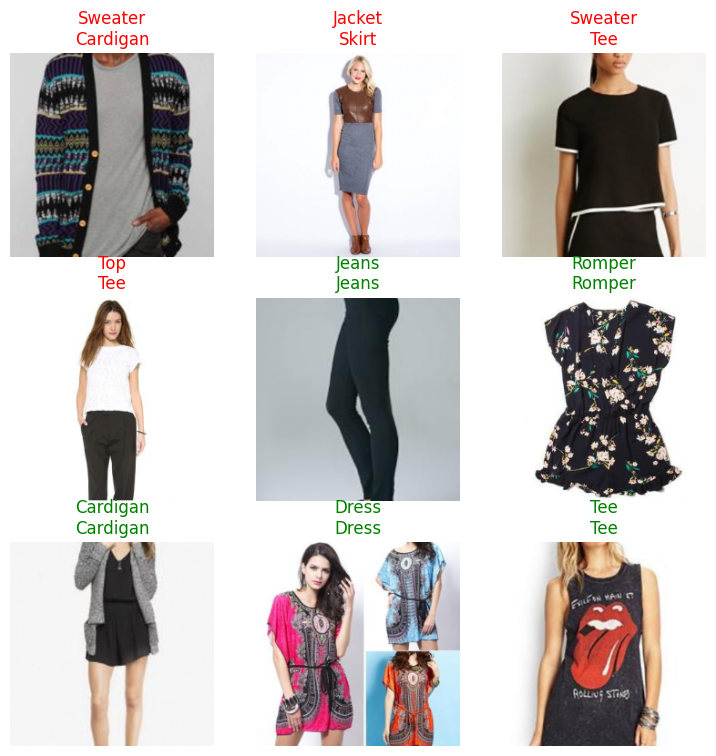

In [ ]:
learn.show_results()

In [ ]:
def accuracy_topk(output, target, topk=(3,)):
    """Computes the accuracy for the specified values of k"""

    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        #print(correct[:k].contiguous().view(-1))
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
output, target = learn.get_preds()

In [ ]:
print(accuracy_topk(output=output, target=target))

[tensor([89.4270])]


In [ ]:
def predict_attribute(model, path, display_img=True):
    predicted = model.predict(path)
    if display_img:
        size = 244,244
        img=Image.open(path)
        img.thumbnail(size,Image.ANTIALIAS)
        display(img)
    return predicted[0]

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


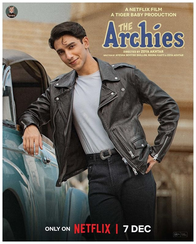

'Jacket'

In [ ]:
image_path ='/content/archies4.jpg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


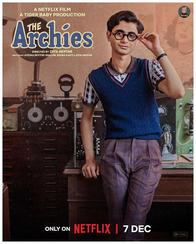

'Sweater'

In [ ]:
image_path ='/content/archies3.jpg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


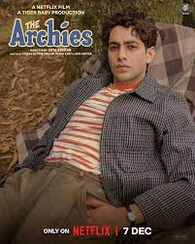

'Tee'

In [ ]:
image_path ='/content/archies2.jpeg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


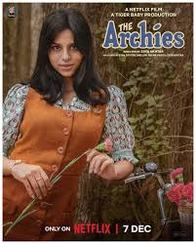

'Dress'

In [ ]:
image_path ='/content/archies.jpeg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


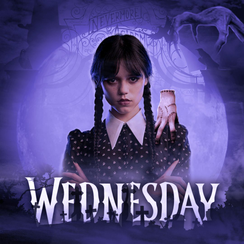

'Blouse'

In [ ]:
image_path ='/content/wednesday4.jpg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


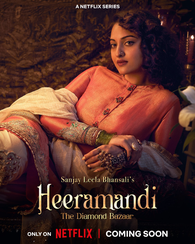

'Blouse'

In [ ]:
image_path ='/content/sonakshi.jpg'
predict_attribute(learn, image_path)

<ipython-input-32-4a3db33b2119>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(size,Image.ANTIALIAS)


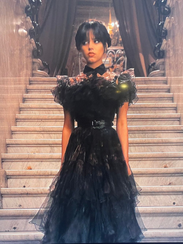

'Dress'

In [ ]:
image_path ='/content/wednesday2.jpg'
predict_attribute(learn, image_path)